In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/CropRecommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df.isnull().any()

,0
N,False
P,False
K,False
temperature,False
humidity,False
ph,False
rainfall,False
label,False


In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
df.dtypes

,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


In [11]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


# Data Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import random

colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [13]:
crop_summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


## Nitrogen Analysis

In [14]:
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Phosphorus Analysis

In [15]:
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P'][0:10].sort_values().index,
    'x' : crop_summary_P['P'][0:10].sort_values()
}

last = {
    'y' : crop_summary_P['P'][-10:].index,
    'x' : crop_summary_P['P'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


## Potassium analysis

In [16]:
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


## N, P, K values comparision between crops

In [17]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

## Comparison of rainfall,Temperature and humidity

In [18]:
fig = px.bar(crop_summary, x=crop_summary.index, y=["rainfall", "temperature", "humidity"])
fig.update_layout(title_text="Comparision between rainfall, temerature and humidity",
                  plot_bgcolor='white',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

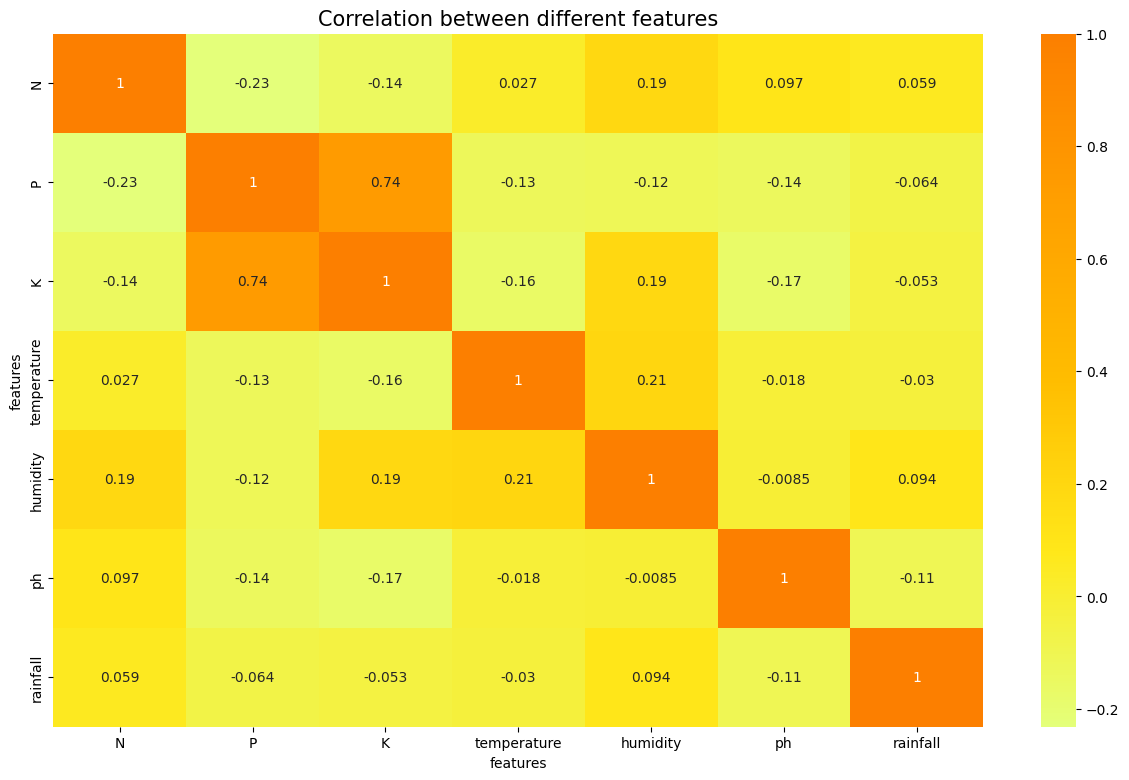

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Wistia', ax=ax)

ax.set(xlabel='features', ylabel='features')
plt.title('Correlation between different features', fontsize=15, color='black')
plt.show()


### Seperating features and target label

In [62]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [63]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [64]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,shuffle=True,random_state =2)

In [65]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1760 entries, 1936 to 1608
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1760 non-null   int64  
 1   P            1760 non-null   int64  
 2   K            1760 non-null   int64  
 3   temperature  1760 non-null   float64
 4   humidity     1760 non-null   float64
 5   ph           1760 non-null   float64
 6   rainfall     1760 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 110.0 KB


In [66]:
Ytrain.info()

<class 'pandas.core.series.Series'>
Index: 1760 entries, 1936 to 1608
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
1760 non-null   object
dtypes: object(1)
memory usage: 27.5+ KB


# Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [70]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

### Saving trained Decision Tree model

In [71]:
import joblib

joblib.dump(DecisionTree, "./Decision_Tree.joblib")

['./Decision_Tree.joblib']

In [72]:
loaded_DT = joblib.load("./Decision_Tree.joblib")

loaded_DT.predict(Xtest)

array(['coffee', 'pomegranate', 'pomegranate', 'cotton', 'mungbean',
       'coffee', 'watermelon', 'coconut', 'pigeonpeas', 'mango',
       'chickpea', 'jute', 'papaya', 'lentil', 'mango', 'maize', 'orange',
       'blackgram', 'cotton', 'orange', 'banana', 'pigeonpeas',
       'muskmelon', 'banana', 'mango', 'pigeonpeas', 'coconut', 'coconut',
       'jute', 'mungbean', 'pomegranate', 'chickpea', 'mungbean',
       'mungbean', 'blackgram', 'coffee', 'cotton', 'muskmelon',
       'blackgram', 'blackgram', 'papaya', 'pomegranate', 'pomegranate',
       'jute', 'blackgram', 'pomegranate', 'pomegranate', 'mungbean',
       'coffee', 'chickpea', 'coffee', 'blackgram', 'cotton',
       'pigeonpeas', 'cotton', 'lentil', 'mungbean', 'banana', 'lentil',
       'orange', 'coconut', 'jute', 'pigeonpeas', 'grapes', 'pigeonpeas',
       'grapes', 'grapes', 'pomegranate', 'coffee', 'maize', 'apple',
       'orange', 'chickpea', 'mango', 'banana', 'maize', 'banana', 'jute',
       'pomegranate', 'm

# Guassian Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [32]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [33]:
import joblib

joblib.dump(NaiveBayes, "./Naive_Bayes.joblib")

['./Naive_Bayes.joblib']

In [34]:
loaded_NB = joblib.load("./Naive_Bayes.joblib")

loaded_NB.predict(Xtest)

array(['coffee', 'pomegranate', 'pomegranate', 'cotton', 'mungbean',
       'coffee', 'watermelon', 'coconut', 'pigeonpeas', 'mango',
       'chickpea', 'jute', 'papaya', 'mothbeans', 'mango', 'maize',
       'orange', 'blackgram', 'cotton', 'orange', 'banana', 'kidneybeans',
       'muskmelon', 'banana', 'mango', 'kidneybeans', 'coconut',
       'coconut', 'jute', 'mungbean', 'pomegranate', 'chickpea',
       'mungbean', 'mungbean', 'mothbeans', 'coffee', 'cotton',
       'muskmelon', 'blackgram', 'blackgram', 'papaya', 'pomegranate',
       'pomegranate', 'jute', 'mothbeans', 'pomegranate', 'pomegranate',
       'mungbean', 'coffee', 'chickpea', 'coffee', 'blackgram', 'cotton',
       'pigeonpeas', 'cotton', 'lentil', 'mungbean', 'banana', 'lentil',
       'orange', 'jute', 'jute', 'pigeonpeas', 'grapes', 'pigeonpeas',
       'grapes', 'grapes', 'pomegranate', 'coffee', 'maize', 'apple',
       'orange', 'chickpea', 'mango', 'banana', 'maize', 'banana', 'jute',
       'pomegranate', 

# Support Vector Machine (SVM)

In [35]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

### Cross validation score (SVM)

In [36]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

### Saving trained SVM model

In [37]:
import joblib

joblib.dump(SVM, "./S_V_M.joblib")

['./S_V_M.joblib']

In [38]:
loaded_SVM = joblib.load("./S_V_M.joblib")

loaded_SVM.predict(Xtest)

array(['rice', 'apple', 'apple', 'rice', 'apple', 'rice', 'apple',
       'apple', 'rice', 'apple', 'apple', 'rice', 'apple', 'apple',
       'apple', 'rice', 'papaya', 'apple', 'rice', 'coconut', 'apple',
       'rice', 'apple', 'apple', 'apple', 'rice', 'coconut', 'coconut',
       'rice', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'rice', 'rice', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'rice', 'apple', 'apple', 'apple', 'apple', 'rice',
       'apple', 'rice', 'apple', 'rice', 'rice', 'rice', 'apple', 'apple',
       'apple', 'apple', 'coconut', 'apple', 'rice', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'rice', 'rice', 'apple',
       'papaya', 'apple', 'apple', 'apple', 'rice', 'apple', 'rice',
       'apple', 'apple', 'apple', 'apple', 'rice', 'apple', 'apple',
       'apple', 'papaya', 'rice', 'rice', 'apple', 'rice', 'rice',
       'apple', 'coconut', 'coconut', 'apple', 'apple', 'rice', 'apple',
       'apple', 'apple', 

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [40]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

### Saving trained Logistic Regression model

In [41]:
import joblib

joblib.dump(LogReg, "./Logistic_Regression.joblib")

['./Logistic_Regression.joblib']

In [42]:
loaded_LR = joblib.load("./Logistic_Regression.joblib")

loaded_LR.predict(Xtest)

array(['coffee', 'pomegranate', 'pomegranate', 'cotton', 'mungbean',
       'coffee', 'watermelon', 'coconut', 'pigeonpeas', 'mango',
       'chickpea', 'jute', 'papaya', 'blackgram', 'mango', 'maize',
       'orange', 'blackgram', 'cotton', 'orange', 'banana', 'kidneybeans',
       'muskmelon', 'banana', 'mango', 'kidneybeans', 'coconut',
       'coconut', 'rice', 'mungbean', 'pomegranate', 'chickpea',
       'mungbean', 'mungbean', 'mothbeans', 'coffee', 'maize',
       'muskmelon', 'mothbeans', 'blackgram', 'papaya', 'pomegranate',
       'pomegranate', 'jute', 'mothbeans', 'pomegranate', 'pomegranate',
       'lentil', 'coffee', 'chickpea', 'coffee', 'blackgram', 'cotton',
       'pigeonpeas', 'maize', 'lentil', 'mungbean', 'banana', 'lentil',
       'orange', 'rice', 'jute', 'pigeonpeas', 'grapes', 'pigeonpeas',
       'grapes', 'grapes', 'pomegranate', 'coffee', 'maize', 'apple',
       'orange', 'chickpea', 'mango', 'banana', 'maize', 'banana', 'jute',
       'pomegranate', 'mun

# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

### Cross validation score (Random Forest)

In [44]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

### Saving trained Random Forest model

In [45]:
import joblib

joblib.dump(RF, "./Random_Forest.joblib")

['./Random_Forest.joblib']

In [46]:
loaded_RF = joblib.load("./Random_Forest.joblib")

loaded_RF.predict(Xtest)

array(['coffee', 'pomegranate', 'pomegranate', 'cotton', 'mungbean',
       'coffee', 'watermelon', 'coconut', 'pigeonpeas', 'mango',
       'chickpea', 'jute', 'papaya', 'mothbeans', 'mango', 'maize',
       'orange', 'blackgram', 'cotton', 'orange', 'banana', 'kidneybeans',
       'muskmelon', 'banana', 'mango', 'kidneybeans', 'coconut',
       'coconut', 'jute', 'mungbean', 'pomegranate', 'chickpea',
       'mungbean', 'mungbean', 'mothbeans', 'coffee', 'cotton',
       'muskmelon', 'blackgram', 'blackgram', 'papaya', 'pomegranate',
       'pomegranate', 'jute', 'mothbeans', 'pomegranate', 'pomegranate',
       'mungbean', 'coffee', 'chickpea', 'coffee', 'blackgram', 'cotton',
       'pigeonpeas', 'cotton', 'lentil', 'mungbean', 'banana', 'lentil',
       'orange', 'jute', 'jute', 'pigeonpeas', 'grapes', 'pigeonpeas',
       'grapes', 'grapes', 'pomegranate', 'coffee', 'maize', 'apple',
       'orange', 'chickpea', 'mango', 'banana', 'maize', 'banana', 'jute',
       'pomegranate', 

# LightGBM

pip install lightgbm

In [47]:
import lightgbm as lgb
from sklearn import metrics

# Create an instance of LGBMClassifier
LGBM = lgb.LGBMClassifier()
LGBM.fit(Xtrain, Ytrain)




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1332
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.007161
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.042252
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.116360
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.196403
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] 

LGBMClassifier()

In [48]:

predicted_values = LGBM.predict(Xtest)

# Calculate accuracy
accuracy = metrics.accuracy_score(Ytest, predicted_values)
acc.append(accuracy)
model.append('LGBM')
print("Light Gradient Boosting Machine's Accuracy is: ", accuracy)

# Print classification report
print(classification_report(Ytest, predicted_values))


Light Gradient Boosting Machine's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.93      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange  

In [49]:
score = cross_val_score(LGBM,features,target,cv=5)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [50]:
score

array([0.99545455, 0.98636364, 0.99318182, 0.98636364, 0.98863636])

In [51]:
newdata=LGBM.predict([[90, 42, 43, 20.879744, 75, 5.5,220]])
newdata

array(['rice'], dtype=object)

In [52]:
import joblib

joblib.dump(LGBM, "./L_GBM.joblib")

['./L_GBM.joblib']

In [53]:
loaded_LGBM = joblib.load("./L_GBM.joblib")

loaded_LGBM.predict(Xtest)

array(['coffee', 'pomegranate', 'pomegranate', 'cotton', 'mungbean',
       'coffee', 'watermelon', 'coconut', 'pigeonpeas', 'mango',
       'chickpea', 'jute', 'papaya', 'mothbeans', 'mango', 'maize',
       'orange', 'blackgram', 'cotton', 'orange', 'banana', 'kidneybeans',
       'muskmelon', 'banana', 'mango', 'kidneybeans', 'coconut',
       'coconut', 'jute', 'mungbean', 'pomegranate', 'chickpea',
       'mungbean', 'mungbean', 'mothbeans', 'coffee', 'cotton',
       'muskmelon', 'blackgram', 'blackgram', 'papaya', 'pomegranate',
       'pomegranate', 'jute', 'mothbeans', 'pomegranate', 'pomegranate',
       'mungbean', 'coffee', 'chickpea', 'coffee', 'blackgram', 'cotton',
       'pigeonpeas', 'cotton', 'lentil', 'mungbean', 'banana', 'lentil',
       'orange', 'rice', 'jute', 'pigeonpeas', 'grapes', 'pigeonpeas',
       'grapes', 'grapes', 'pomegranate', 'coffee', 'maize', 'apple',
       'orange', 'chickpea', 'mango', 'banana', 'maize', 'banana', 'jute',
       'pomegranate', 

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

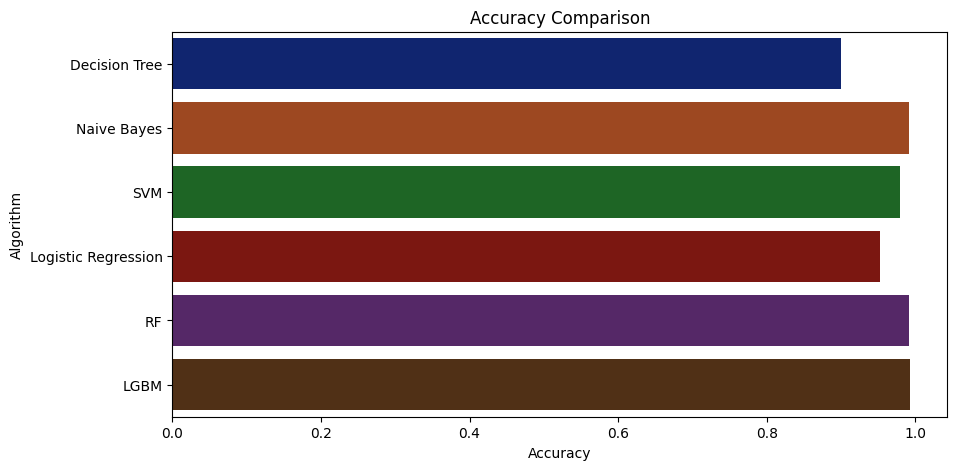

In [54]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [55]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v*100)

Decision Tree --> 90.0
Naive Bayes --> 99.0909090909091
SVM --> 97.95454545454545
Logistic Regression --> 95.22727272727273
RF --> 99.0909090909091
LGBM --> 99.31818181818181


## Making a prediction

In [56]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [57]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [58]:
newdata=LGBM.predict([[90, 42, 43, 20.879744, 75, 5.5,220]])
newdata

array(['rice'], dtype=object)

In [59]:
newdata=LGBM.predict([[75, 70, 30, 28.097357, 60, 7.5,150]])
newdata

array(['blackgram'], dtype=object)

## Confusion Matrix

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score

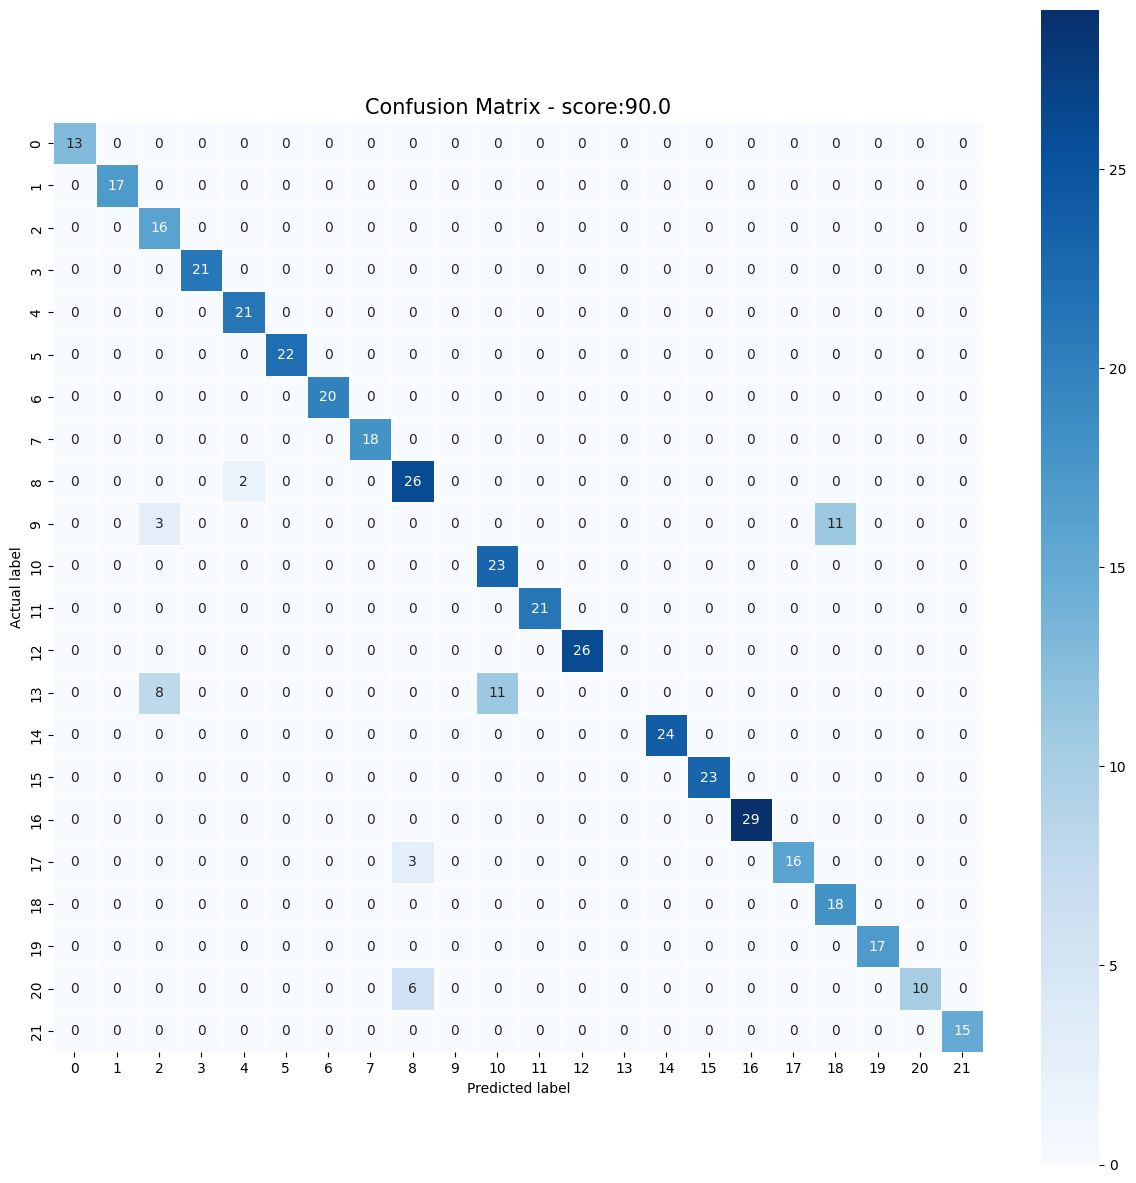

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, predicted_values)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,predicted_values)*100)
plt.title(all_sample_title, size = 15);
plt.show()